In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib_venn as venn

from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h1 face = "Times New Roma" color='#3f134f'  > Probability basics </h1>

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <li><a href='#head1'>How the probabilities depend on the number of experiments</a> </li><br>
      <li><a href='#alg'>Algebra of events</a> </li><br>  
      <li><a href='#cond'>Conditional probability</a> </li><br>  
      <li><a href='#bayes'> Bayes's Theoremy</a> </li><br>  
        
</ul>    
 </font>
  </h6>
  

<font size="1" id="abstract">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Abstract</h2>

<font size="1" id="head1">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; How the probabilities depend on the number of experiments</h2>

<font face = "Times New Roma" size="4.5"  color='#270336' >
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; The probability is math theory and approach to the quantitative the randomness events around us. That allows us to analyze the  chance  of events in a logically sound manner. The probability P is a real number between $[0,1]$ indicating how likely  some event will occur. The most popular example is the tossing of a fair coin, in which possible outcomes are head and tail denoted by $S = [H, T]$. $S$ is called sample space or all unique possible outcome or just $set$ of all possible results. The probability of flipping an H or T is equal to $\frac{1}{2}$ or
  50% . What does 50%  means we will see later .
</font>    

<h6> 
    <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp; We will use the random library of $NumPy$ in order to perform experiments based on randomness. <br>
</font>    
</h6>  
  

In [11]:
def random_experiment(N , sample, times=1, custom_handler=None ):
    '''
    Perform of random experiment
    
    
    Parameters:
     N : int 
     number of experiments which will be performed
   
    sample : ndarray
     The set from which will be chosen a random element
     
    times : int
      number of outcomes related to one experiments
     
    custom_handler : call function 
     provides ability for custom experiment  
     
     return : ndarray
       result of experiments
    
    '''
    result = np.array([])
    for i in range(N) :
        experiment_result = [np.random.choice(sample) for i in range(times)]
        
        if custom_handler is not None:
            experiment_result = custom_handler(experiment_result)
            
        result =np.append(result, experiment_result)    
    
    return np.array(result) 


def hist(N , sample, times=1, experiment=None, **kwargs):
    '''
    wrapper function of random_experiment for plotting of result in histogram 
    
    Parameters :
      kwards : map
      properties for histogram
    
    '''
    data = random_experiment(N ,sample ,times=times,custom_handler = experiment)
    
    l = 'Count experiments:{}'.format(N)
    axes =plt.gca()

    axes.yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
   
    bins = None
    for key, value in kwargs.items(): 
        if key=='title' :
            title =  value 
        elif key=='figsize':
            pass
        elif key == 'y_size':    
            axes.set_ylim(value)  
        elif key == 'bins' :
            bins = value    
        elif key == 'y_scalled':
             axes.set_ylim(value)
    plt.hist(data , weights=np.ones(len(data)) / (len(data)) , bins=bins,alpha = 0.4,label=l, histtype='bar', rwidth=1)        
    plt.title(title)        
    plt.legend()

<font face = "Times New Roma" size="3"  color='#270336' >
&nbsp;&nbsp;&nbsp; When we flip a coin the sample space is $$S = [H,T]$$
For the fair coin, we expect 50% for occurring both $H$ and $T$.That means if we perfom many experiments , we expect that half of all possible outcomes will be H the remaining half will be the T moreover, this expectation will stand more precisely by increasing the number of tossing of a coin.

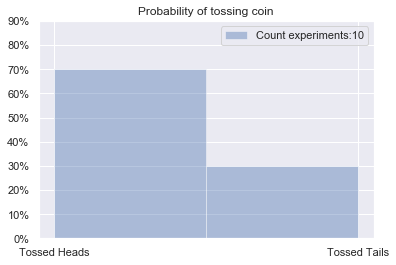

In [13]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg[0] == 'H':
        return 'Tossed Heads'
    else:
        return 'Tossed Tails'
hist(10,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4.5"  color='#270336' >
   In the above histogram, we see that the $70$% of outcomes are Heads and 40% are Tail. The result is not as we expected since the number of experiments is 10 which is too small. 
</font>    

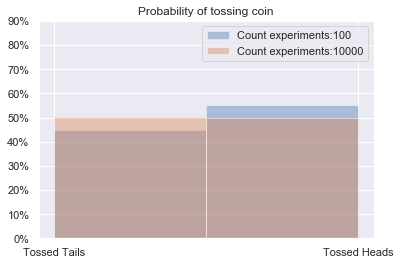

In [17]:
hist(100,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))
hist(10000,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4.5"  color='#270336' >
   In the above histogram, the blue color shows the result when  experiments are 100, and the brown shows when they are 10000. It is obvious that when the number of experiments is increased then  H and T get closer to 50%.
</font>    

<font face = "Times New Roma" size="4.5"  color='#270336' >
  
When we toss a coin 3 times and record the results in the sequence that they occur, then the sample space is <br> <br>
$$ S = [ HHH,\; HHT,\; HTH ,\; HTT ,\; THH ,\; THT ,\; TTH ,\; TTT ]$$
<br>    
Thus the probability to occur $HTT$ is equal to $\frac{1}{len(S)}= \frac{1}{8}=12$%.
Let to pefrom this exeriment.    
</font>    

In [18]:
def experiment(arg) :
    if arg[0] == 'H' and arg[1]=='T' and arg[2]=='T':
        return 'HTT occurs'
    else:
        return 'HTT not occur'

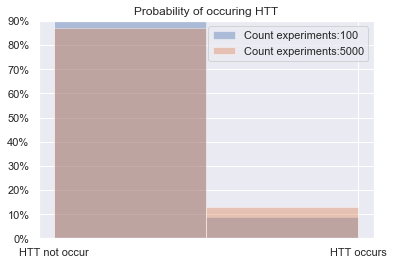

In [19]:
hist(100,sample_space,times = 3, experiment = experiment,title='Probability of occuring HTT',bins=2,y_scalled=(0,0.9))
hist(5000,sample_space,times = 3, experiment = experiment,title='Probability of occuring HTT',bins=2,y_scalled=(0,0.9))


<font face = "Times New Roma" size="4.5"  color='#270336' >
 We see in 5000 experiments the probability of occuring HTT tends to 12%
</font>    

<font size="1" id="alg">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Algebra of events</h2>

<font face = "Times New Roma" size="4"  color='#270336' >
Since events are sets, wich are just subsets of the sample space $S$, we can do the usual $\displaystyle set $ operations.
</font>    

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
    <font face = "Times New Roma" size="4"  color='#270336' >
        union or $OR$ denoted by $\cup$ <br>
        intersection or $AND$ denoted by $\cap$ <br>
        complement $\overline E$ or $E^c$ or $S/E$ every event $F\in S$  except  E or just $not\; E$
    </font>    
</h3>  
    

<font face = "Times New Roma" size="4"  color='#270336' >
Axioms of probability:
</font>    
<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
    <font face = "Times New Roma" size="4"  color='#270336' >
     1. for any event $E \in S$,  $0 \leq P(A) \leq 1$ <br> <br>
     2. P(S) = 1 <br> <br>
    3 . for any counably infinite sequence of  events $(E_i)$ that are mutualy exclusive (i.e $E_i  \cap E_j = \emptyset $if $i\ne j)$ satisfy <br>
  $P(\cup E_i)=\sum_iP(E_i)$
  </font>    
</h3>  
        

<h6> 
    <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp;First let to include the Venn diagrams <br>
</font>    
</h6>  
  

In [26]:
def plot_ven(A,B,S,intersect=False,label_f=False):
    v = venn3([A,B,S], ('A', 'B', 'S'))
    s_t = b_a = ab= a_b = ' '
    if label_f :
        s_t = r'$S | (A\cup B)$'
        b_a = r'$B | (A\cap B)$ '
        a_b = r'$A | (B\cap A) $'
        ab = r'$A\cap B $'
        
    v.get_label_by_id('001').set_text('\n'.join(S - A - B) +' \n' +s_t ) 
    v.get_label_by_id('011').set_text('\n'.join(B- (A&B) ) +' \n' +b_a ) 
    if intersect:
        v.get_label_by_id('111').set_text('\n'.join(A&B ) +' \n' +ab ) 
    v.get_label_by_id('101').set_text('\n'.join(A - (A&B))  +' \n' +a_b)

<font face = "Times New Roma" size="4"  color='#270336' >
  example: <br>
    In fliping the coin tree times the sample space  is $S=S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$. <br> 
    if we   define events $A= [HHH]$ (only H is occured) and event $B = [TTT]$(only T is occured) using the $Venn$ diagrams
    we can represent events.
</font>    

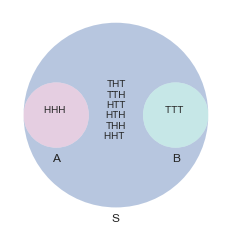

In [27]:
S = set(['HHH' , 'HHT' , 'HTH' , 'HTT' , 'THH' , 'THT' , 'TTH' , 'TTT']) # sample space
A = set(['HHH']) # event A
B = set(['TTT']) # event B

plot_ven(A,B,S)

<font face = "Times New Roma" size="4"  color='#270336' >
From Venn diagram we can see that $A \cap B = \emptyset$ that mean A and B are independent events . $p(A) = \frac{1}{8},\;\; p(B) = \frac{1}{8}$  if  apply axiom 3 <br>
$p(A \cup B) = p(A) + p(B) = \frac{1}{8} + \frac{1}{8} = \frac{1}{4} = 25$% <br>
Let to do an experiment.    
</font>    

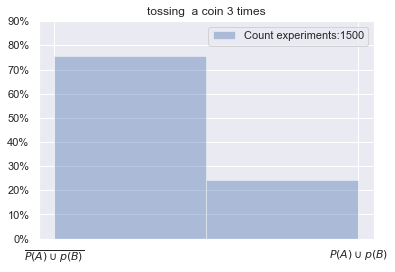

In [32]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg == ['H','H','H'] or arg == ['T','T','T']:
        return r'$P(A)\cup p(B)$'
    else:
        return r'$\overline{P(A)\cup p(B)}$'
hist(1500,sample_space, times=3 ,experiment = experiment,title='tossing  a coin 3 times',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
 Ok ! the  histogram confirm above result. <br> <br>
    Let to define some useful properties.
 </font>   

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
<font face = "Times New Roma" size="4"  color='#270336' >
   property 1 . since $A\cup \overline A = S$ and sing axioms 2 and 3 we can write. <br> <br>
     $ p(A\cup \overline A) = p(A) + p(\overline A)=1$ <br>
 $\Rightarrow p(A) = 1-p(\overline A)$
  </font>    
</h3>  

<font face = "Times New Roma" size="4"  color='#270336' >
example : <br>
     if event A is $A = ['HHH' , 'HHT' , 'HTH' , 'HTT' , 'THH' , 'THT' , 'TTH' ]$ (to occur at least one H) then 
    $\overline A=[TTT]$ (not occur H) <br> 
    applying propery (1) we write $p(A) = 1 - p(\overline A ) = 1 - \frac{1}{8} =  88$%
</font>    

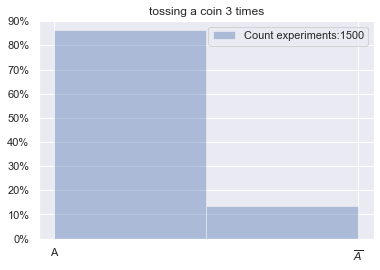

In [43]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg[0] == 'H' or  arg[1] == 'H'   or arg[2] == 'H'  :
        return 'A'
    else:
        return r'$\overline{A}$'
hist(1500,sample_space, times=3 ,experiment = experiment,title='tossing a coin 3 times',bins=2,y_scalled=(0,0.9))

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
<font face = "Times New Roma" size="4"  color='#270336' >
property 3 :
    if any two events $A,B \in S$(dependent or indetependent) we can
    write : <br> <br>
    $$p(A \cup B ) = p(A) + p(B) - p(A \cap B)$$
</font>
</h3>
<font face = "Times New Roma" size="4"  color='#270336' >
The Venn diagram  can help us to  see why this property is correct !
exampe : <br>
Again we have a tosing  a coin 3 times and the sample space is  $S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$
 <br> <br>
Let event $A = [HHH,HHT,HTH,THH] $ (to ccour H at least 2  times)  the probability of event A is $ p(A) = \frac{4}{8} = 50$% <br> <br>
let event $B = [THH,TTH,TTT] $ (in first index the coin to be T) then the probability is $p(B) = \frac{3}{8} = 37$% 
    <br> <br>
for the intersect $p(A \cap B) = [THH] $ the probability is  $p(A \cap B) = \frac{1}{8} = 12 $%
<br>
</font>

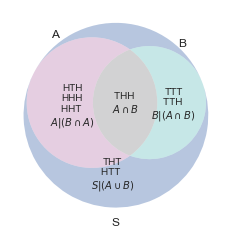

In [38]:
A = set(['HHH','HHT','HTH','THH'])
B = set(['THH','TTH','TTT'])

plot_ven(A,B,S,intersect=True,label_f=True)

<font face = "Times New Roma" size="4"  color='#270336' >
 From the Venn diagram the searching region can be found as
</font>    
<h3  color='#270336' style="margin-right: 45px; margin-left: 45px">
<font face = "Times New Roma" size="4"  color='#270336' >    
 $ p(A\cup B) = p(A / (B \cap A)) + p(B \cap A) +  p(B/(A \cap B))$
 <br> <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A) - p(B \cap A) + p(B \cap A) +  p(B) -  p(A \cap B)$ 
 <br> <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A)  +  p(B) -  p(A \cap B)$
 <br> <br>
if we plug  their probabily found avobe then we will achieve
<br> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A)  +  p(B) -  p(A \cap B) =  50 + 37 - 12 = 75$%
</font>
</h3>


<font face = "Times New Roma" size="4"  color='#270336' >
  Let to see an experiment related to the above result what  will be give
</font>    

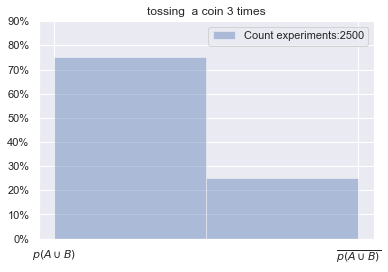

In [42]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg == ['H' ,'H' , 'H'] or arg ==['H','H','T'] or arg==['H','T','H'] or arg==['T','H','H'] or arg ==['T','H','H'] or arg == ['T','T','H'] or arg== ['T','T','T']  :
        return r'$p(A\cup B)$'
    else:
        return r'$\overline{p(A\cup B)}$'
hist(2500,sample_space, times=3 ,experiment = experiment,title='tossing  a coin 3 times',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
  As expected . The result is $p(A\cup B)=75$%
</font>    

<font size="1" id="cond">... </font> 
<h2> Conditional probability </h2>

<font face = "Times New Roma" size="4"  color='#270336' >
Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion or evidence) occurred matematicaly it is defined as :<br>
$$p(A|B) = \frac{p(B\cap A)}{p(B)}$$
we read as what is the probability of A if B is occured     <br>
exampe : <br>
again we have fliplin the coin 3 times . <br>
Again the sample space is $S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$ <br> <br>
 $B = [HHH , HHT , HTH , HTT]$ (in first index to occur H) $P(B) = \frac{1}{2}= 50$%  <br> <br>
 $A= [HHH,HHT,HTH,THH] $ (to have al least 2 heads)  $P(A) = \frac{1}{2}= 50$%

and  $p( B \cap A) = [HHT, HHH,HTH] =  \frac{3}{8} =37$%    
<br> <br>
What is the probability of A if B is oocured ? <br>
Let to see the Venn diagram .
</font>    

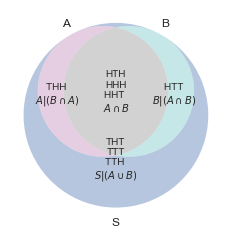

In [44]:
A = set(['HHH','HHT','HTH','THH'])
B = set(['HHH' , 'HHT' , 'HTH' , 'HTT'])

plot_ven(A,B,S,intersect=True,label_f=True)

<font face = "Times New Roma" size="4"  color='#270336' >
    First, the region wich is our target is $(A \cap B)$  the number of element in these region we will denote as
    $n((A \cap B))=N$ the number of elements in $B$ will be $K = n(b)$, then the probability of occuring A when B is occured <br> <br>
    $$\frac{n(A \cap B)}{ n(b) } = \frac{N}{K} = \frac{N/n(S)}{K/n(S)} = \frac{p(A \cap B)}{p(B)}$$

$$  = \frac{3/8}{1/2}=\frac{2}{3} = 0.75$$
Let to verify with experiment is 75 is correct

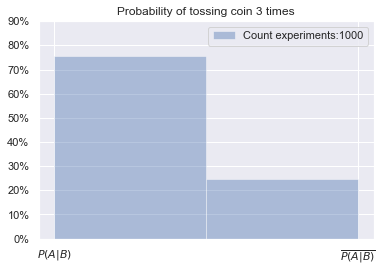

In [45]:
sample_space = np.array(['HHT','HHH','HTH','HTT'])
def experiment(arg) :
    if arg[0] == 'HHT'  or arg[0] =='HHH' or arg[0]=='HTH' :
        return r'$P(A|B)$'
    else:
        return r'$\overline {P(A|B)}$'
hist(1000,sample_space, times=1 ,experiment = experiment,title='Probability of tossing coin 3 times',bins=2,y_scalled=(0,0.9))

<font size="1" id="bayes"  >... </font> 
<h2 color='#270336' face = "Times New Roma"> Bayes's Theorem </h2>



<font face = "Times New Roma" size="4"  color='#270336' >
Bayes’ theorem is stated mathematically as the following equation:
   $$ p(A|B) = \frac{p(B |A)p(A)}{p(B)} $$
   where $\displaystyle A$ and $\displaystyle B$  are events and $\displaystyle P(B)\neq 0$ $\displaystyle P(B)\neq 0$. <br> <br>
   proof:
<font>   

<h3  color='#270336' style="margin-right: 45px; margin-left: 45px">
<font face = "Times New Roma" size="4"  color='#270336' >    
from conditional probability we have :
    <br> <br>
    $1)\;\;p(A|B)p(B) = p(B\cap A)$ 
   <br> <br>
  respectively for probabily of event B given A
  <br> <br>
$2) \; \;p(B|A)p(A) = p(A\cap B) $
<br> <br>
using commutative law of Union <br> <br>
$A\cap B= B \cap A$ 
<br> <br>
and plug eq(2) to eq(1) we achieve <br> <br>
$\;p(B|A)p(A) = p(A\cap B) = p(B \cap A) = p(A|B)p(B) $  <br> <br>
$ 	\Rightarrow p(A|B) = \frac{p(B |A)p(A)}{p(B)} $ <br> <br>
or

$p(B|A) = \frac{p(A|B)p(B)}{p(A)} $
</font>
</h3>